In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import json
import scrapy
import matplotlib.pyplot as plt

In [3]:
list_dapil_dpr = 'https://caleg.zakiego.com/api/dpr-ri/dapil/list'
list_calon_dpr = 'https://caleg.zakiego.com/api/dpr-ri/dapil/'
detail_calon_dpr = 'https://caleg.zakiego.com/api/dpr-ri/calon/'
data = requests.get(list_dapil_dpr).json()

In [5]:
class CalegSpider(scrapy.Spider):
    name = 'caleg_spider'
    start_urls = ['https://caleg.zakiego.com/api/dpr-ri/dapil/list']
    list_calon_dpr = 'https://caleg.zakiego.com/api/dpr-ri/dapil/'
    detail_calon_dpr = 'https://caleg.zakiego.com/api/dpr-ri/calon/'
    filename = 'dataset/dump_caleg_dpr_2024.json'
    state_filename = 'dataset/state_crawl.json'

    def __init__(self, *args, **kwargs):
        super(CalegSpider, self).__init__(*args, **kwargs)
        self.load_state()

    def load_state(self):
        try:
            with open(self.state_filename, 'r') as f:
                self.state = json.load(f)
        except FileNotFoundError:
            self.state = {'last_processed_url': None}

    def save_state(self):
        with open(self.state_filename, 'a') as f:
            json.dump(self.state, f)
            f.write('\n')

    def parse(self, response):
        data = json.loads(response.body)
        for dapil in data['data']:
            yield scrapy.Request(url=self.list_calon_dpr + dapil['id'], callback=self.parse_calon)

    def parse_calon(self, response):
        data_list_calon = json.loads(response.body)
        for calon in data_list_calon['data']:
            yield scrapy.Request(url=self.detail_calon_dpr + calon['id'], callback=self.parse_detail)

    def parse_detail(self, response):
        data_detail_calon = json.loads(response.body)
        self.save_data(data_detail_calon)

    def save_data(self, data):
        with open(self.filename, 'a') as f:
            json.dump(data, f)
            f.write('\n')

    def handle_error(self, failure):
        # Tangani kesalahan di sini, misalnya log dan/atau tindakan lainnya
        self.logger.error(repr(failure))
        # Simpan URL yang sedang diproses
        self.state['last_processed_url'] = failure.request.url
        self.save_state()

if __name__ == "__main__":
    from twisted.internet import reactor
    from scrapy.crawler import CrawlerRunner

    runner = CrawlerRunner()
    d = runner.crawl(CalegSpider)
    d.addErrback(CalegSpider.handle_error)
    reactor.run()  # Mulai reactor Twisted untuk menjalankan spider secara asinkron


C:\Users\GhilmanFatih\anaconda3\envs\dpr2024\lib\site-packages\scrapy\utils\request.py:232: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.
  return cls(crawler)


In [25]:
# Read the file content as a string to investigate the structure
filename = 'dataset/dump_caleg_dpr_2024.json'
with open(filename, 'r') as file:
    file_content = file.read()

# Check the first 500 characters to understand the structure
file_content[:500]


'{"id": "jawa-tengah-v/partai-bulan-bintang/7", "namaPartai": "Partai Bulan Bintang", "logoPartai": "berkas-sipol/parpol/profil/gambar_parpol/1659262742_LOGO PBB.png", "dapilId": "3305", "namaDapil": "JAWA TENGAH V", "nomorUrut": 7, "pasFoto": "https://infopemilu.kpu.go.id/dct/berkas-silon/calon/484442/pas_foto/1696164520_5fc4974b-a40c-4378-845a-5e5af87735a6.jpeg", "nama": "DIAH KURNIAWATI ULFAH", "jenisKelamin": "perempuan", "pilihanPublikasi": null, "statusPublikasi": null, "tempatLahir": null,'

In [26]:
# Split the file content into separate JSON objects
# Assuming each object is separated by line breaks or specific patterns
json_objects = file_content.split('}\n{')

# Fix the split objects - add missing braces
json_objects = [obj if obj.startswith('{') and obj.endswith('}') else '{' + obj + '}' for obj in json_objects]

# Attempt to parse each object into a dictionary
parsed_data = []
for obj_str in json_objects:
    try:
        obj = json.loads(obj_str)
        parsed_data.append(obj)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

# Check how many objects we have successfully parsed
len(parsed_data), parsed_data[:2]  # Display the length and first 2 objects to check


Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Error decoding JSON: Extra data: line 2 column 1 (char 1301)


(9915,
 [{'id': 'jawa-tengah-v/partai-demokrat/5',
   'namaPartai': 'Partai Demokrat',
   'logoPartai': 'berkas-sipol/parpol/profil/gambar_parpol/1656229496_WhatsApp Image 2022-06-26 at 1.53.14 PM.png',
   'dapilId': '3305',
   'namaDapil': 'JAWA TENGAH V',
   'nomorUrut': 5,
   'pasFoto': 'https://infopemilu.kpu.go.id/dct/berkas-silon/calon/357709/pas_foto/1688717570_bb62b7a0-905f-4b2d-9ee2-70fbec2588d0.jpeg',
   'nama': 'WIRANTI SAPUTRI, S.E.',
   'jenisKelamin': 'perempuan',
   'pilihanPublikasi': None,
   'statusPublikasi': None,
   'tempatLahir': None,
   'usia': None,
   'agama': None,
   'statusDisabilitas': None,
   'pekerjaan': None,
   'riwayatPekerjaan': None,
   'statusHukum': None,
   'riwayatPendidikan': None,
   'riwayatKursusDiklat': None,
   'riwayatOrganisasi': None,
   'riwayatPenghargaan': None,
   'programUsulan': None,
   'motivasi': None},
  {'id': 'jawa-tengah-iv/partai-perindo/4',
   'namaPartai': 'PARTAI PERINDO',
   'logoPartai': 'berkas-sipol/parpol/profil/g

In [27]:
# Extract relevant data: Partai and highest education level
education_levels = {'SD': 1, 'SMP': 2, 'SMA': 3, 'D1': 4, 'D2': 4, 'D3': 4, 'D4': 5, 'S1': 5, 'S2': 6, 'S3': 7}

# Create a DataFrame to store the data
df_data = []

for record in parsed_data:
    if 'riwayatPendidikan' in record and record['riwayatPendidikan'] is not None:
        highest_level = 0
        for education in record['riwayatPendidikan']:
            level = education_levels.get(education['jenjangPendidikan'], 0)
            highest_level = max(highest_level, level)
        # Convert highest level back to education level string for readability
        highest_education = [key for key, value in education_levels.items() if value == highest_level]
        if highest_education:
            df_data.append([record['namaPartai'], highest_education[-1]]) # Use the highest level found

# Create DataFrame
df = pd.DataFrame(df_data, columns=['Partai', 'Tingkat Pendidikan Tertinggi'])

# Aggregate by party and find the mode (most common) highest education level
mode_education_per_party = df.groupby('Partai')['Tingkat Pendidikan Tertinggi'].agg(pd.Series.mode)

# Reset index to make 'Partai' a column again for plotting
mode_education_per_party = mode_education_per_party.reset_index()

# Display the mode education levels per party
mode_education_per_party


,Partai,Tingkat Pendidikan Tertinggi
0,PARTAI PERINDO,S1
1,Partai Amanat Nasional,S3
2,Partai Bulan Bintang,SMA
3,Partai Buruh,SMA
4,Partai Demokrasi Indonesia Perjuangan,S1
5,Partai Demokrat,SMA
6,Partai Gelombang Rakyat Indonesia,SMA
7,Partai Gerakan Indonesia Raya,S1
8,Partai Hati Nurani Rakyat,SMA
9,Partai Keadilan Sejahtera,S1


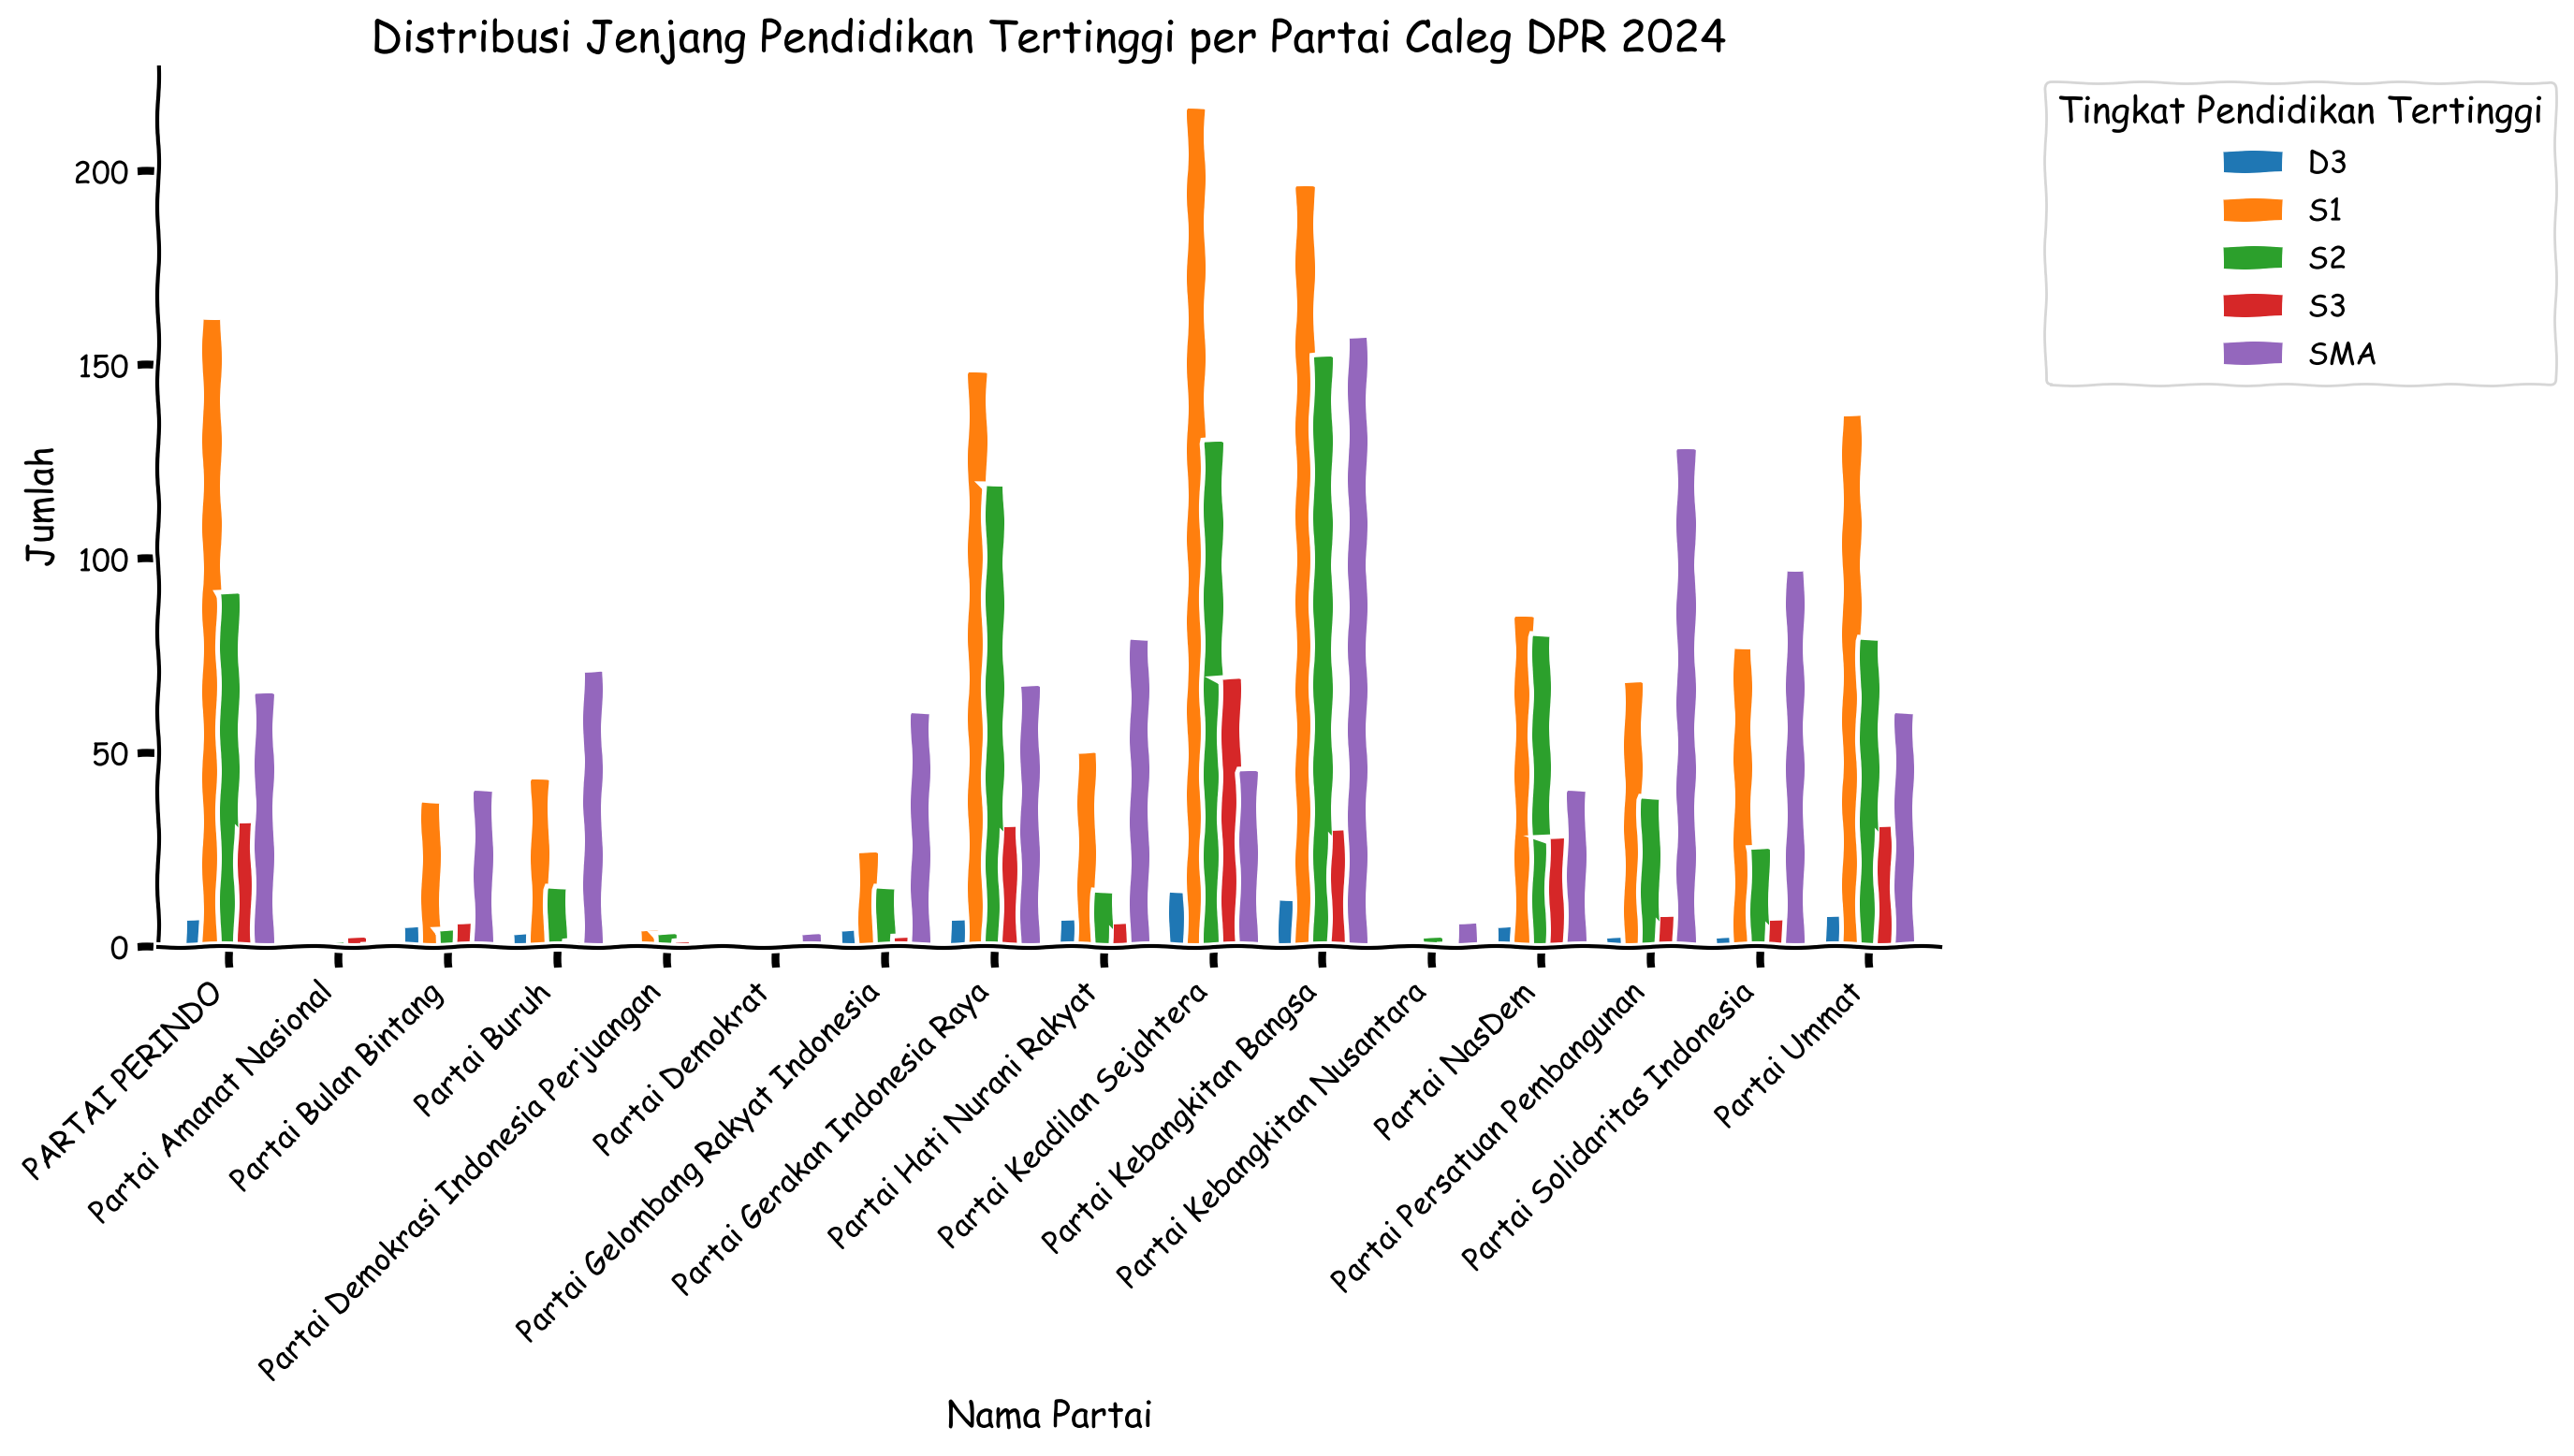

In [78]:
# Calculate the count of the highest education level per party
education_count_per_party = df.groupby(['Partai', 'Tingkat Pendidikan Tertinggi']).size().unstack(fill_value=0)

# Plotting
with plt.xkcd():
    education_count_per_party.plot(kind='bar', figsize=(14, 8), width=0.8, stacked=False)
    plt.xlabel('Nama Partai')
    plt.ylabel('Jumlah')
    plt.title('Distribusi Jenjang Pendidikan Tertinggi per Partai Caleg DPR 2024')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tingkat Pendidikan Tertinggi', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [36]:
education_count_per_party

Tingkat Pendidikan Tertinggi,D3,S1,S2,S3,SMA
Partai,,,,,
PARTAI PERINDO,7,162,91,32,65
Partai Amanat Nasional,0,0,1,2,0
Partai Bulan Bintang,5,37,4,6,40
Partai Buruh,3,43,15,1,71
Partai Demokrasi Indonesia Perjuangan,0,4,3,1,0
Partai Demokrat,0,0,0,0,3
Partai Gelombang Rakyat Indonesia,4,24,15,2,60
Partai Gerakan Indonesia Raya,7,148,119,31,67
Partai Hati Nurani Rakyat,7,50,14,6,79


In [39]:
# Attempt to read the JSON file line by line or handle a more complex structure
try:
    with open(filename, 'r') as file:
        data = pd.read_json(file, lines=True)
except ValueError:
    # If the above fails, it might be due to a more complex structure or multiple JSON objects
    # Let's try a different approach
    with open(filename, 'r') as file:
        content = file.read()
        # Trying to interpret the JSON content directly
        try:
            data_list = pd.json_normalize(eval(content))
            data = pd.DataFrame(data_list)
        except Exception as e:
            error = str(e)

In [53]:
data.groupby('namaPartai')['usia'].agg(['min', 'max', 'mean', 'count'])

,min,max,mean,count
namaPartai,,,,
PARTAI PERINDO,0.0,74.0,45.491349,578
Partai Amanat Nasional,21.0,74.0,47.839286,560
Partai Bulan Bintang,21.0,81.0,46.048951,429
Partai Buruh,0.0,81.0,42.013359,524
Partai Demokrasi Indonesia Perjuangan,22.0,80.0,50.300353,566
Partai Demokrat,29.0,32.0,30.666667,3
Partai Garda Republik Indonesia,NaN,NaN,NaN,0
Partai Gelombang Rakyat Indonesia,21.0,85.0,45.664962,391
Partai Gerakan Indonesia Raya,0.0,74.0,45.121891,402


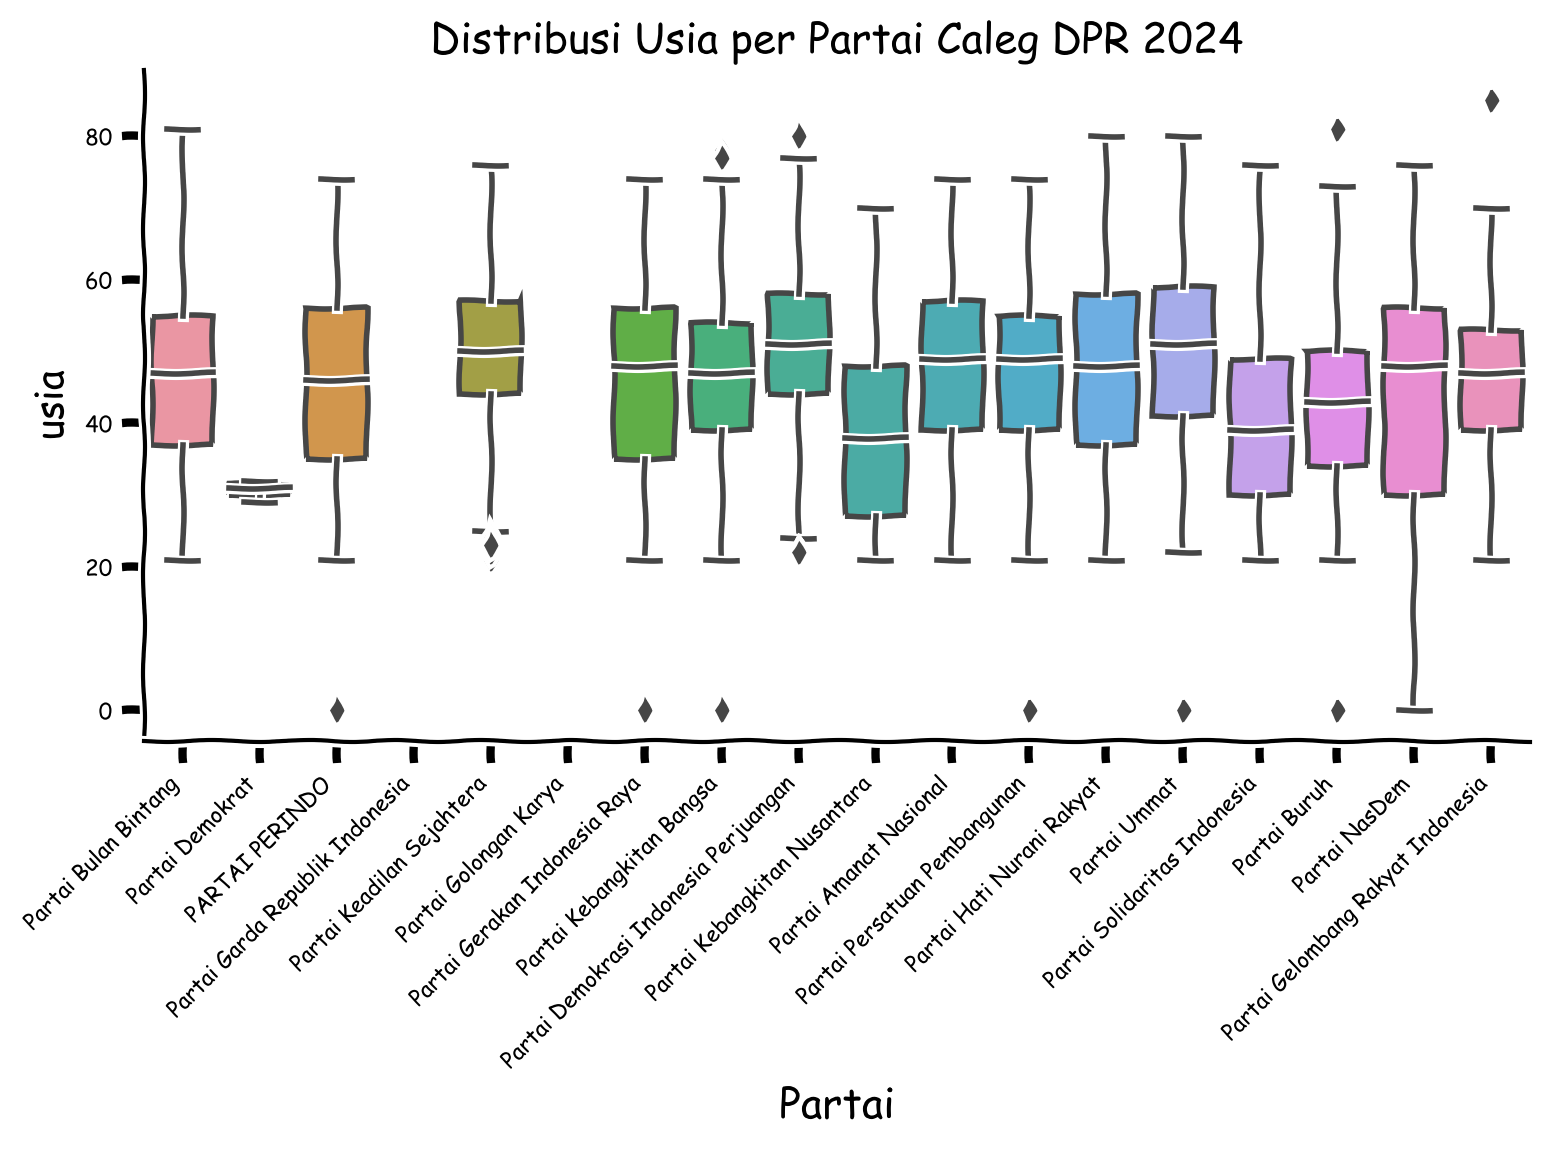

In [77]:
import seaborn as sns
with plt.xkcd():
    ax = sns.boxplot(x='namaPartai', y='usia', data=data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
    ax.axes.set_title('Distribusi Usia per Partai Caleg DPR 2024',fontsize=15)
    ax.axes.set_xlabel('Partai',fontsize=15)
    ax.tick_params(labelsize=8)